In [1]:
import numpy as np
from tqdm.autonotebook import tqdm, trange
import pandas as pd
import sys
sys.path.append('../utilities')

import evaluation
import load_data
import utils
import models_torch

C:\Users\Lyle\AppData\Local\Temp\ipykernel_60312\3717577850.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Here are some settings to make sure the notebook runs:

In [2]:
#def_model_params is a list of: [batch_size, G_LR, D_LR, A_LR, noise_dim, epochs, n_hidden, layer_size]
def_model_params = [256, 3e-4, 3e-4, 3e-4, 8, 10, 1, 400] 
numinst = 1 #Number of instantiations to test
numgen = 5000 #Number of samples to generate
numanim = 1 #Number of intermediate steps to animate/score
scaling = True #Scale or not
scorebars = True #Print progress bars for scoring functions

Here are the settings from our actual experiments:

In [3]:
# def_model_params = [256, 3e-4, 3e-4, 3e-4, 8, 10000, 1, 400] 
# numinst = 6 #Number of instantiations to test
# numgen = 5000 #Number of samples to generate
# numanim = 1 #Number of intermediate steps to animate/score
# scaling = True #Scale or not
# scorebars = True #Print progress bars for scoring functions

100%|██████████| 195/195 [00:02<00:00, 67.23it/s, L_D_real=1.0722, L_D_neg=1.0956, L_D_fake=0.9899, L_G=1.2464, L_div=9.5936] 


Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.47s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.44s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.41s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.43s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.42s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.40s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.42s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.45s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.42s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.40s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.43s/it]


Calculating DPP Diversity
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:07<00:00,  1.46s/it]


Calculating DPP Diversity


<Figure size 640x480 with 0 Axes>

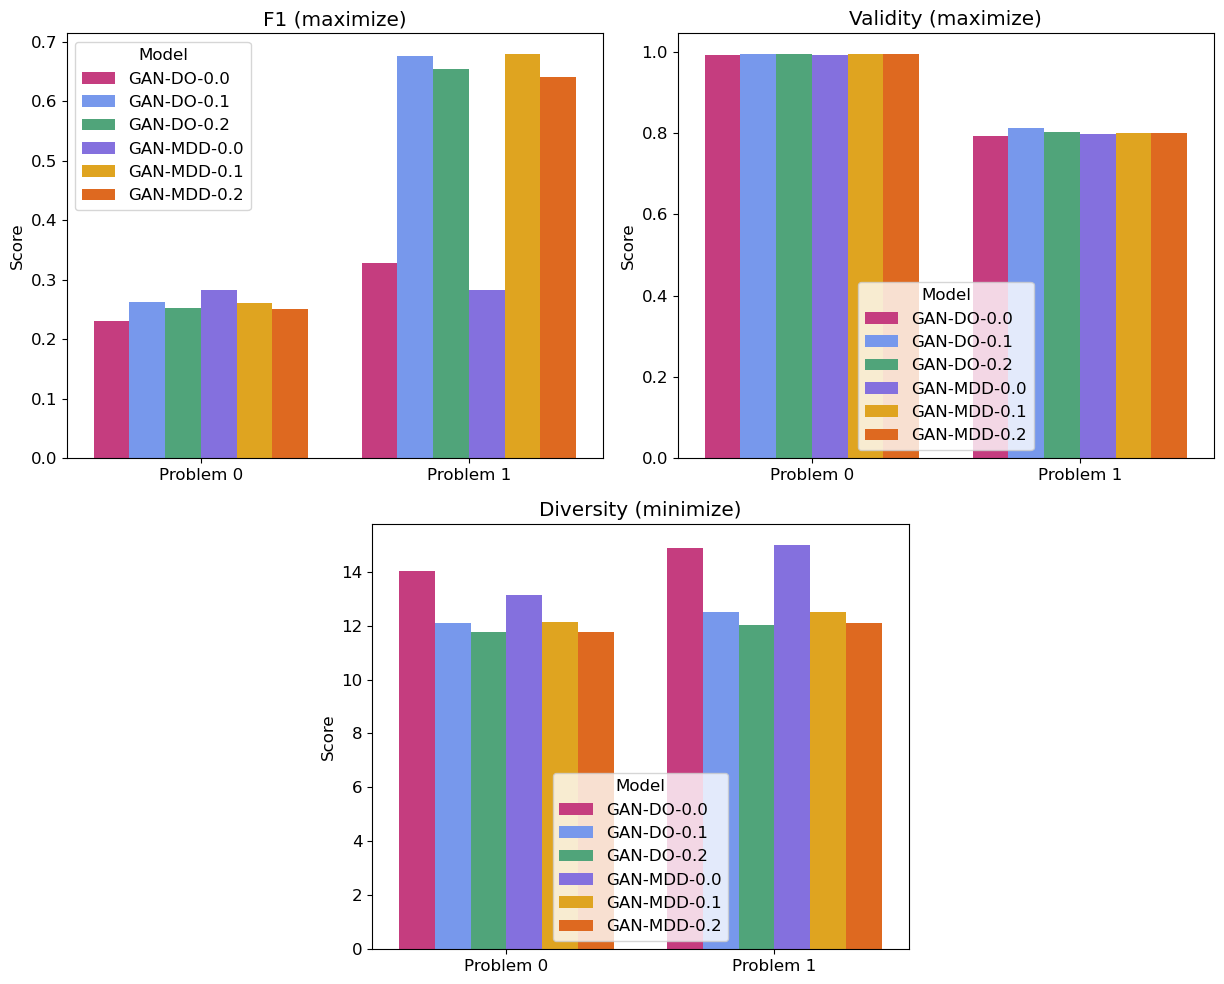

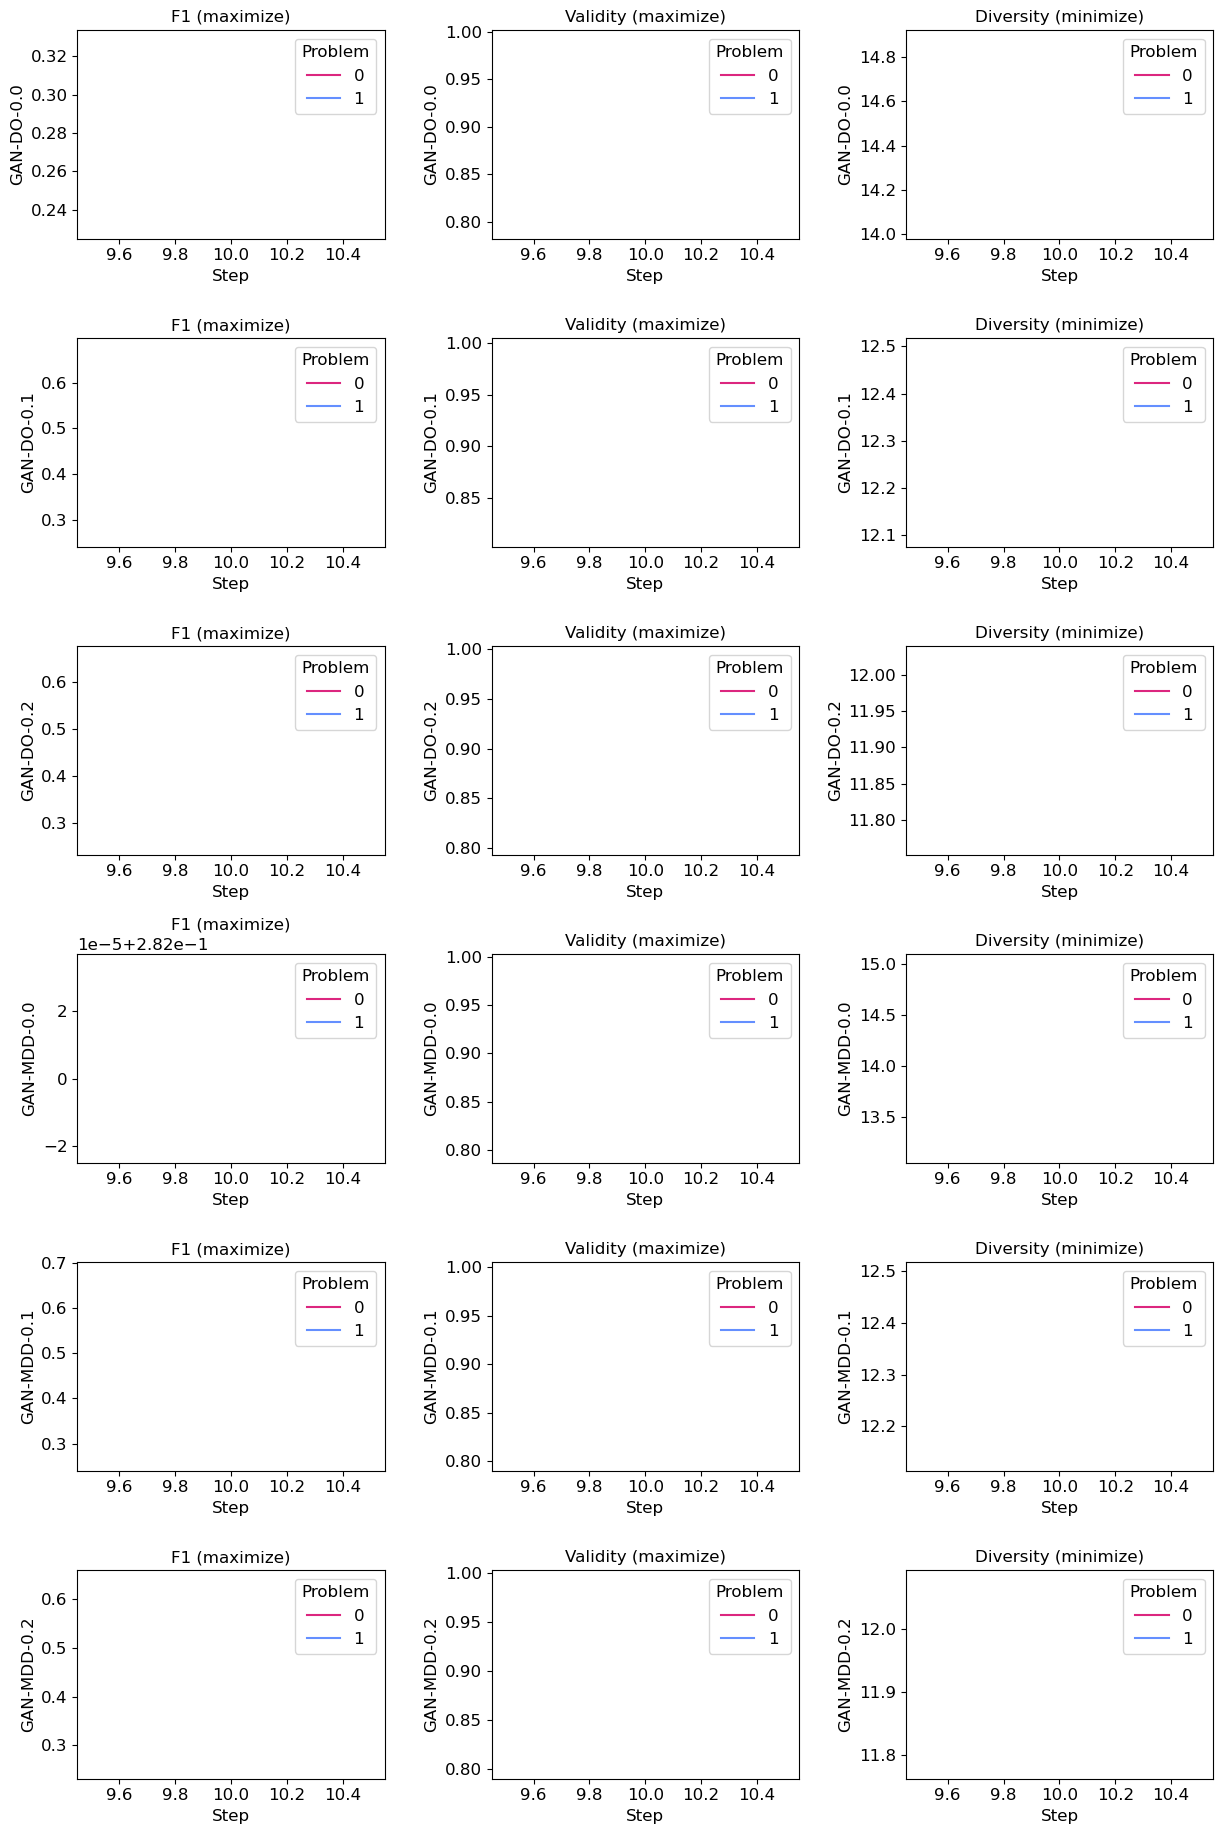

,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,0.229900,0.262465,0.253170,0.281978,0.261140,0.250905
Validity,0.991400,0.995200,0.993400,0.992600,0.995000,0.993400
Diversity,14.023451,12.095728,11.765400,13.141561,12.132605,11.777168


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,0.229900,0.262465,0.253170,0.281978,0.261140,0.250905
Validity,0.991400,0.995200,0.993400,0.992600,0.995000,0.993400
Diversity,14.023451,12.095728,11.765400,13.141561,12.132605,11.777168


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,0.229900,0.262465,0.253170,0.281978,0.261140,0.250905
Validity,0.991400,0.995200,0.993400,0.992600,0.995000,0.993400
Diversity,14.023451,12.095728,11.765400,13.141561,12.132605,11.777168


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,0.328705,0.675828,0.654593,0.282034,0.679997,0.639855
Validity,0.792400,0.812000,0.802800,0.796800,0.800000,0.800200
Diversity,14.877365,12.496780,12.025957,15.003905,12.498401,12.078094


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,0.328705,0.675828,0.654593,0.282034,0.679997,0.639855
Validity,0.792400,0.812000,0.802800,0.796800,0.800000,0.800200
Diversity,14.877365,12.496780,12.025957,15.003905,12.498401,12.078094


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,0.328705,0.675828,0.654593,0.282034,0.679997,0.639855
Validity,0.792400,0.812000,0.802800,0.796800,0.800000,0.800200
Diversity,14.877365,12.496780,12.025957,15.003905,12.498401,12.078094


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,0.229900,0.262465,0.253170,0.281978,0.261140,0.250905
Problem 2,0.328705,0.675828,0.654593,0.282034,0.679997,0.639855


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,0.229900,0.262465,0.253170,0.281978,0.261140,0.250905
Problem 2,0.328705,0.675828,0.654593,0.282034,0.679997,0.639855


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,0.229900,0.262465,0.253170,0.281978,0.261140,0.250905
Problem 2,0.328705,0.675828,0.654593,0.282034,0.679997,0.639855


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,0.991400,0.995200,0.993400,0.992600,0.995000,0.993400
Problem 2,0.792400,0.812000,0.802800,0.796800,0.800000,0.800200


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,0.991400,0.995200,0.993400,0.992600,0.995000,0.993400
Problem 2,0.792400,0.812000,0.802800,0.796800,0.800000,0.800200


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,0.991400,0.995200,0.993400,0.992600,0.995000,0.993400
Problem 2,0.792400,0.812000,0.802800,0.796800,0.800000,0.800200


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,14.023451,12.095728,11.765400,13.141561,12.132605,11.777168
Problem 2,14.877365,12.496780,12.025957,15.003905,12.498401,12.078094


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,14.023451,12.095728,11.765400,13.141561,12.132605,11.777168
Problem 2,14.877365,12.496780,12.025957,15.003905,12.498401,12.078094


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
Problem 1,14.023451,12.095728,11.765400,13.141561,12.132605,11.777168
Problem 2,14.877365,12.496780,12.025957,15.003905,12.498401,12.078094


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,4.500000,1.000000,2.500000,2.500000,1.000000,3.500000
Validity,5.000000,0.000000,2.000000,4.000000,2.000000,2.000000
Diversity,4.500000,2.000000,0.000000,4.500000,3.000000,1.000000


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,0.27930±0.04940,0.46915±0.20668,0.45388±0.20071,0.28201±0.00003,0.47057±0.20943,0.44538±0.19447
Validity,0.89190±0.09950,0.90360±0.09160,0.89810±0.09530,0.89470±0.09790,0.89750±0.09750,0.89680±0.09660
Diversity,14.45041±0.42696,12.29625±0.20053,11.89568±0.13028,14.07273±0.93117,12.31550±0.18290,11.92763±0.15046


,GAN-DO-0.0,GAN-DO-0.1,GAN-DO-0.2,GAN-MDD-0.0,GAN-MDD-0.1,GAN-MDD-0.2
F1,0.279303,0.469147,0.453881,0.282006,0.470569,0.445380
Validity,0.891900,0.903600,0.898100,0.894700,0.897500,0.896800
Diversity,14.450408,12.296254,11.895679,14.072733,12.315503,11.927631


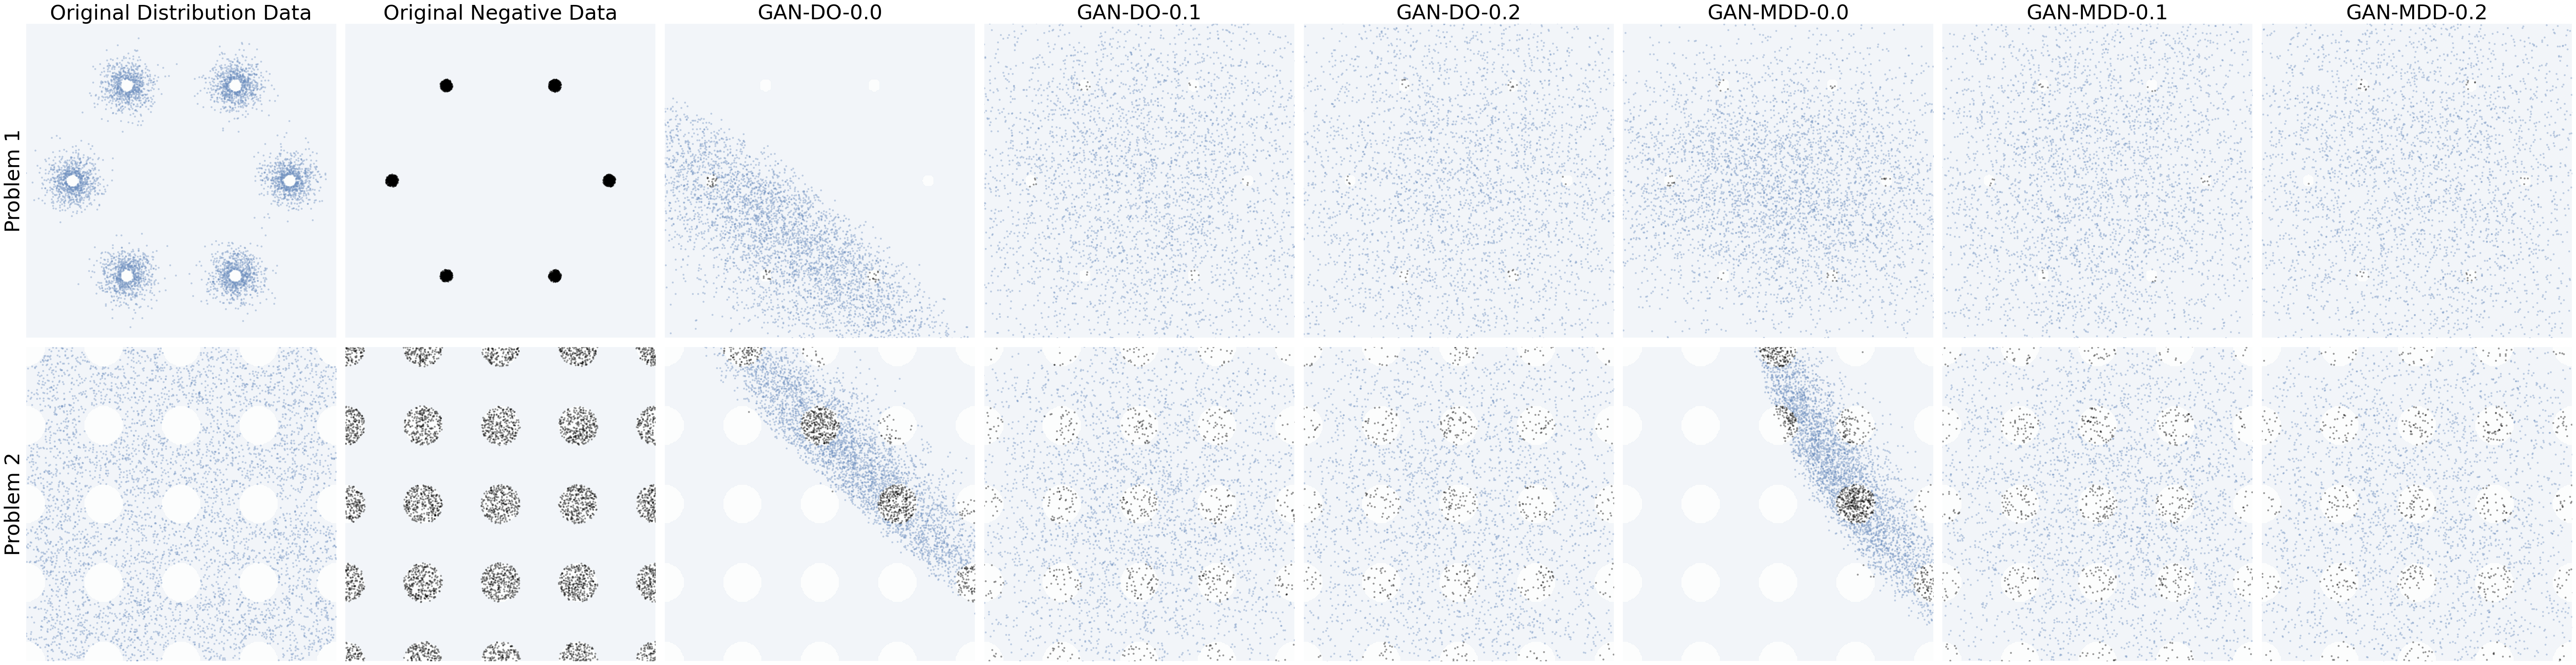

In [4]:
%matplotlib inline
np.random.seed(0) #ensures datasets are the same (models still random)

rangearr = np.array([[-1,1], [-1,1]])

functions=[]

def get_dataset_func(samplingfunction, validityfunction, rangearr):
    def sample(samplingfunction = samplingfunction, validityfunction=validityfunction, rangearr=rangearr):
        distribution, negative = samplingfunction(validityfunction, rangearr)
        positive = distribution #Positive will be ignored for now
        return distribution, negative, positive
    return sample

num_pos = 5000
num_neg = 5000

sampling_func_donuts = load_data.sample_circle_blobs_wrapper(num_pos, num_neg, 6, 0.7, 0.1)
validity_func_donuts = load_data.inv_radial_circles_val_wrapper(0.7, 0.04, 6)
datasetfunction_donuts = get_dataset_func(sampling_func_donuts, validity_func_donuts, rangearr)
functions.append([datasetfunction_donuts, validity_func_donuts, None, rangearr, None, None])

sampling_func_circgrid = load_data.sample_uniform_wrapper(num_pos, num_neg)
validity_func_circgrid = load_data.circles_val_wrapper(0.25, 2)
datasetfunction_circgrid = get_dataset_func(sampling_func_circgrid, validity_func_circgrid, rangearr)
functions.append([datasetfunction_circgrid, validity_func_circgrid, None, rangearr, None, None])

#----------------------------------------------------------------------------------

#Select methods to test
methods=pd.Series()

#[train_step, validity_weight, diversity_weight]
methods["GAN-DO-0.0"] = models_torch.train_wrapper(def_model_params, ["GAN_DO", None, 0]) #this model already run in 2D main
methods["GAN-DO-0.1"] = models_torch.train_wrapper(def_model_params, ["GAN_DO", None, 0.1])
methods["GAN-DO-0.2"] = models_torch.train_wrapper(def_model_params, ["GAN_DO", None, 0.2])

methods["GAN-MDD-0.0"] = models_torch.train_wrapper(def_model_params, ["GAN_MDD", None, 0])
methods["GAN-MDD-0.1"] = models_torch.train_wrapper(def_model_params, ["GAN_MDD", None, 0.1]) #this model already run in 2D main
methods["GAN-MDD-0.2"] = models_torch.train_wrapper(def_model_params, ["GAN_MDD", None, 0.2])

metrics=pd.Series()
metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["Validity"] = ["maximize", "Validity"] #Validity is handled specially in utils
metrics["Diversity"] = ["minimize", evaluation.DPP_diversity_wrapper("x", 1000, 10, False)]


timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, 0, 0, holdout=0)
utils.score(timestr, functions, methods, metrics, numinst, scaling, 0, scorebars, plotscores=True, score_instances=True)
utils.plot_all(timestr, functions, methods, numinst, scaling, 1, 0, 0, 0, "blue", plot_steps=False)